<a href="https://colab.research.google.com/github/ucaokylong/Some_small_projects/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [2]:
!gdown --id 1JDd8GwKXCf1Wk9gxJeEHyGXAJw-M6zH8
!gdown --id 1tsha38II30H6DJco8GV6-iYGSvKgg60d

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JDd8GwKXCf1Wk9gxJeEHyGXAJw-M6zH8
To: /content/art_daily_jumpsup.csv
100% 141k/141k [00:00<00:00, 124MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1tsha38II30H6DJco8GV6-iYGSvKgg60d
To: /content/art_daily_small_noise.csv
100% 140k/140k [00:00<00:00, 85.2MB/s]


In [3]:
small_noise_url = "art_daily_small_noise.csv"
df_small_noise = pd.read_csv(small_noise_url, parse_dates=True, index_col="timestamp")
print(df_small_noise.shape)

daily_jumpsup_url = "art_daily_jumpsup.csv"
df_daily_jumpsup = pd.read_csv(daily_jumpsup_url, parse_dates=True, index_col="timestamp")
print(df_daily_jumpsup.shape)

(4032, 1)
(4032, 1)


## Quick look at the data

In [4]:
print(df_small_noise.head())
print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


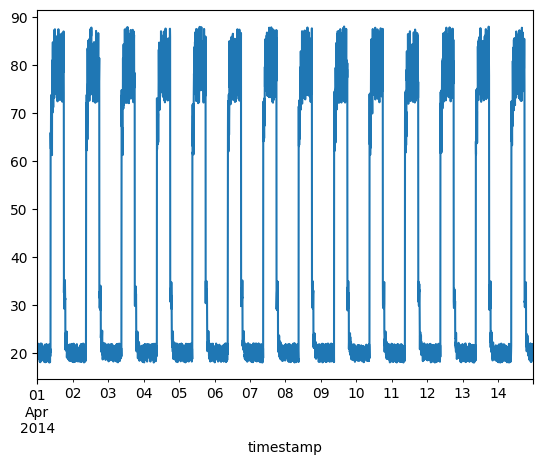

In [5]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()

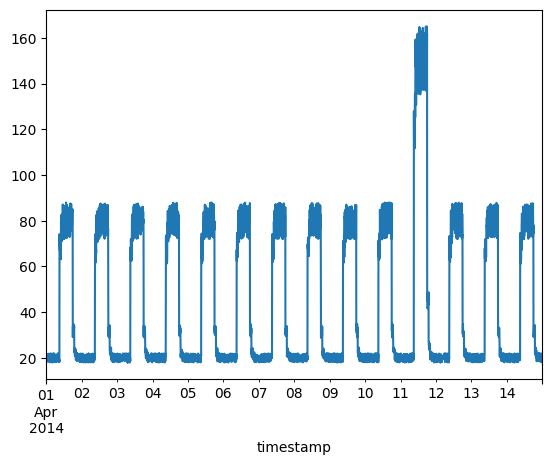

In [6]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()

In [7]:
# Normalize
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


In [8]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


In [9]:
model = keras.Sequential([layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Dropout(rate=0.2),
        layers.Conv1D(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same")])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTr  (None, 144, 16)           1808      
 anspose)                                                        
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1D  (None, 288, 32)           3616      
 Transpose)                                             

In [28]:
history = model.fit(x_train,x_train,
    epochs=70,
    batch_size=128,
    validation_split=0.1,
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, mode="min")])

Epoch 1/70
27/27 [==============================] - 0s 9ms/step - loss: 0.0030 - val_loss: 0.0054
Epoch 2/70
27/27 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.0064
Epoch 3/70
27/27 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0060
Epoch 4/70
27/27 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0064
Epoch 5/70
27/27 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0049
Epoch 6/70
27/27 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0063
Epoch 7/70
27/27 [==============================] - 0s 9ms/step - loss: 0.0029 - val_loss: 0.0052
Epoch 8/70
27/27 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0066
Epoch 9/70
27/27 [==============================] - 0s 9ms/step - loss: 0.0028 - val_loss: 0.0059
Epoch 10/70
27/27 [==============================] - 0s 10ms/step - loss: 0.0028 - val_loss: 0.0056
Epoch 11/70
27/27 

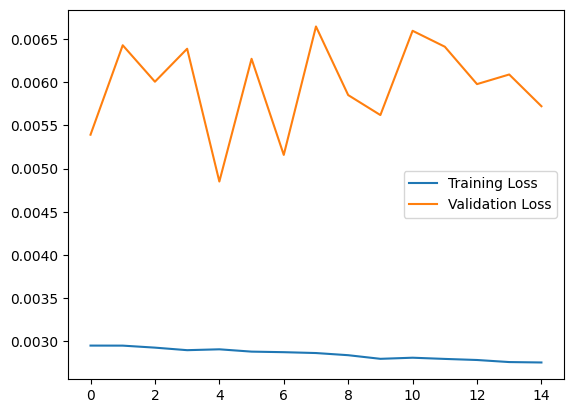

In [29]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

118/118 [==============================] - 1s 4ms/step


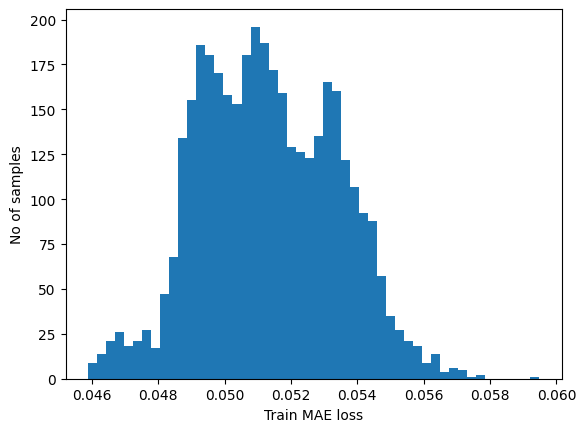

Reconstruction error threshold:  0.05947810778654149


In [30]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

### Compare recontruction


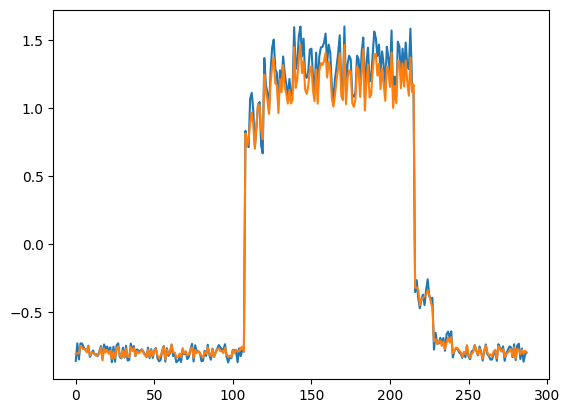

In [31]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

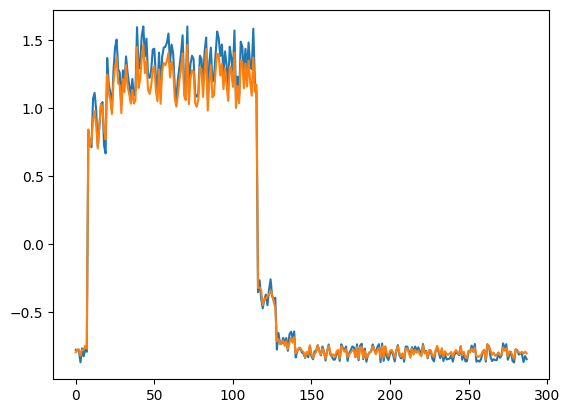

In [32]:
# Checking how the first sequence is learnt
plt.plot(x_train[100])
plt.plot(x_train_pred[100])
plt.show()

### Prepare test data

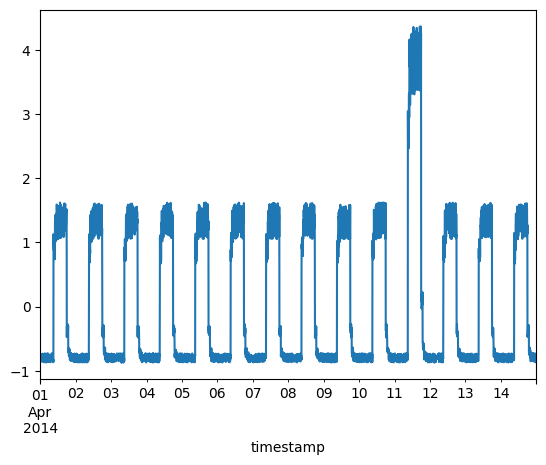

Test input shape:  (3745, 288, 1)


In [33]:
df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

118/118 [==============================] - 0s 2ms/step


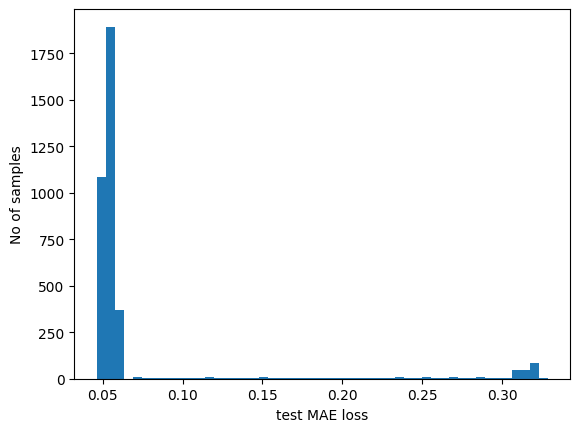

In [39]:
# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

In [40]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

Number of anomaly samples:  498
Indices of anomaly samples:  (array([ 772,  773,  777,  792,  793,  800,  805,  973, 1942, 1954, 1959,
       2039, 2043, 2047, 2051, 2053, 2054, 2055, 2057, 2059, 2061, 2063,
       2065, 2067, 2069, 2070, 2071, 2073, 2074, 2075, 2077, 2078, 2079,
       2081, 2082, 2083, 2085, 2086, 2087, 2089, 2090, 2091, 2093, 2094,
       2095, 2097, 2098, 2099, 2101, 2103, 2105, 2106, 2107, 2109, 2110,
       2111, 2113, 2114, 2115, 2117, 2119, 2122, 2123, 2125, 2519, 2521,
       2522, 2523, 2531, 2535, 2539, 2543, 2547, 2551, 2555, 2559, 2563,
       2567, 2571, 2575, 2579, 2583, 2587, 2591, 2595, 2599, 2603, 2607,
       2611, 2615, 2619, 2623, 2627, 2631, 2635, 2683, 2687, 2691, 2699,
       2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711,
       2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722,
       2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733,
       2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2

In [36]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx+1]):
        anomalous_data_indices.append(data_idx)

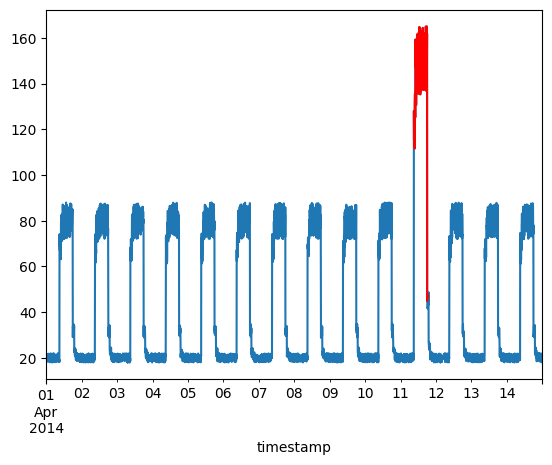

In [37]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

In [38]:
i = anomalous_data_indices[0]
print(i, test_mae_loss[i])

2988 0.2940474077394997
